### Método Montecarlo aplicado al la creación y el aprendizaje de una red neuronal

Las redes neuronales artificiales son un modelo computacional que permite simular el comportamiento del cerebro humano.

<img src="neurona.png">  

La neurona es la unidad fundamental del sistema nervioso y, en particular del cerebro. Se puede ver como una simple unidad de procesamiento. Una neurona típica esta compuesta de un cuerpo celular, o soma, un axón de forma tubular y multitud de dendritas, como se muestra en la figura. El axón es esencialmente un tubo largo que se ramifica en botones sinápticos que casi tocan a las dendritas de otras neuronas. Este pequeño hueco que queda entre la dendrita y el axón se llama sinapsis y es a través del cual se transmite la información. Esta información se transmite mediante estímulos. Cuando a una neurona le llegan estímulos de otras neuronas esta combina los estímulos y si el estímulo resultante es suficientemente fuerte, la neurona produce un estímulo de salida que envía por su axón.

 Nuestro cerebro esta compuesto por unas 10 billones de estas neuronas conectadas cada una de estas con, entre 100 y 100000. Es decir, 10 billones de pequeñas unidades procesadoras, muy simples y muy interconectadas. Esta interconexión, esta red, permite realizar las tareas tan complejas que caracterizan a los animales y sobre todo, a los seres humanos. Y es en esta red de pequeñas unidades de procesamiento en la que se inspira el modelo de las Redes Neuronales Artificiales.
 
 De forma computacional tendremos grupos de neuronas agrupadas por capas y conectadas por unos determinados pesos, como se muestra a continuación:

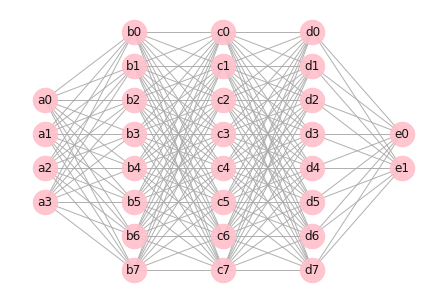

<Figure size 432x288 with 0 Axes>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import esquema_red

capas=[4,8,8,8,2]
plot = esquema_red.red(capas,False)
plot.plt().show()

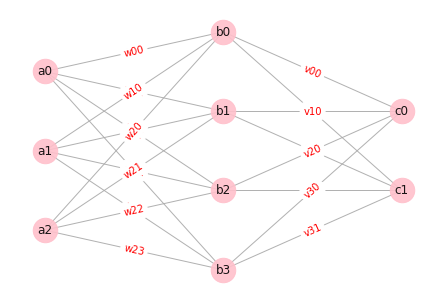

<Figure size 432x288 with 0 Axes>

In [2]:
capas=[3,4,2]
plot = esquema_red.red(capas,True)
plot.plt().show()

La salida quería como:
$$
C=g\left(VB\right)=\{B=g\left(WA\right)\}=g\left(Vg\left(WA\right) \right)
$$

$$ 
B=g\left(WA\right)\ =
\begin{pmatrix}
b_{0}\\
b_{1}\\
b_{2}\\
b_{3}\\
\end{pmatrix}
= g \left( W 
\begin{pmatrix}
a_{0} \\
a_{1} \\
a_{2} \\
\end{pmatrix} \right) = g \left( 
\begin{pmatrix}
w_{00} & w_{10} & w_{20} \\
w_{01} & w_{11} & w_{21} \\
w_{02} & w_{12} & w_{22} \\
w_{03} & w_{13} & w_{23} \\
\end{pmatrix}
\begin{pmatrix}
a_{0} \\
a_{1} \\
a_{2} \\
\end{pmatrix} \right)  =
g \begin{pmatrix}
w_{00}*a_{0} + w_{10}*a_{1} +w_{20}*a_{2} \\
w_{01}*a_{0} + w_{11}*a_{1} +w_{21}*a_{2} \\
w_{02}*a_{0} + w_{12}*a_{1} +w_{22}*a_{2} \\
w_{03}*a_{0} + w_{13}*a_{1} +w_{23}*a_{2} \\
\end{pmatrix}
$$ 

Resumiendo: $b_j = g \left( \sum_i a_i w_{ij} \right)$ donde se suele tomar $g = \frac{1}{1+e^{-x}}$


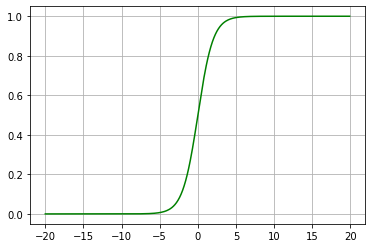

In [3]:
def g(x):
    return 1/(1+math.exp(-x))

x = np.arange(-20, 20, 0.1)
y = list(map(lambda x: g(x), x))
plt.plot(x,y,color='g')
plt.grid()

<hr>
<b><font color='red'>Ejercicio 01</font></b> 

Fíajte en el siguiente decodificador, vamos a a crear una red neuronal que aprenda a dar la misma respuesta
<img src="codificador.png">



|Input|Output|
| :-: | :-: |
| 0 0 0 0 0 0 1 | 0 0 1 |
| 0 0 0 0 0 1 0 | 0 1 0 |
| 0 0 0 0 1 0 0 | 0 1 1 |
| 0 0 0 1 0 0 0 | 1 0 0 |
| 0 0 1 0 0 0 0 | 1 0 1 |
| 0 1 0 0 0 0 0 | 1 1 0 |
| 1 0 0 0 0 0 0 | 1 1 1 |

Crea una función llamada **MIN(A,W,B,V,C,nstep)**, que devuelva **return W,V** de tal manera que minimice el error entre la matriz **C** y la salida $g\left(Vg\left(WA\right)\right)$, para ello realiza **nstep** pasos aleatorios.
Cada paso aleatorio consistira en:
 - Selecionamos un elemento al azar de W(rand,rand)
 - Le asignamos un número de tipo coma flotante aleatorio entre -100 y 100 
 - En el caso en el que el error sea menor que el anterior nos lo quedamos. Toma el error como la raiz cuadrada de la diferencia de los cuadrados de Z y C, siendo Z la salida en la tercera capa y C lo que debería salir, para este caso de 3 neuronas : $error=\sqrt{(Z_0-C_0)^2+(Z_1-C_1)^2+(Z_2-C_2)^2}$
 - Hacemos lo mismo con la matriz V
 
 ayuda: Crea la función **getOut(A,W,B,V,C):** que calcula $g\left(Vg\left(WA\right)\right)$, de esta forma si Z=getOut(A,W,B,V,C)

Vamos a empezar ajustando uno de los casos:


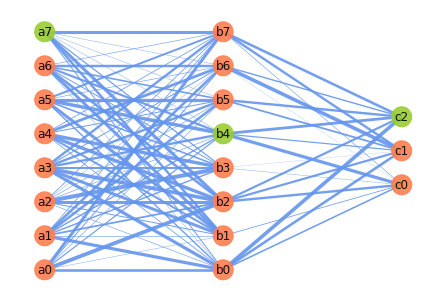

<Figure size 432x288 with 0 Axes>

In [4]:
#Capas de neuronas
A=[0,0,0,0,0,0,0,1]
B=[0,0,0,0,1,0,0,0]
C=[0,0,1]

#Interconexiones, generamos una matriz de nº aleatorios 
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

plot.Pintar(A,W,B,V,C).show()

In [5]:
#Crea aquí tus funciones:
#def getOut(A,W,B,V,C):
#def error(A,W,B,V,C):
#def MIN(A,W,B,V,C,nstep):

In [6]:
MAXP=100
def getOut(A,W,B,V,C):
    Z = np.zeros(len(C))
    for i in range(len(B)):
        out=0
        for j in range(len(A)):
            out+=A[j]*W[j][i]
        B[i]=g(out)

    for i in range(len(Z)):
        out=0
        for j in range(len(B)):
            out+=B[j]*V[j][i]
        Z[i]=g(out)    
    return Z

def error(A,W,B,V,C):  
    Z=getOut(A,W,B,V,C)
    e=0    
    for i in range(len(Z)):
        e+=(Z[i]-float(C[i]))**2
    return math.sqrt(e)

def MIN(A,W,B,V,C,nstep):
    e1=error(A,W,B,V,C)
    #print("Error = ",e1)
    for i in range(nstep):    
        x1=random.randint(0,W.shape[0]-1)
        y1=random.randint(0,W.shape[1]-1)
        w2=W[x1,y1]
        W[x1,y1]=(1-2*random.random())*MAXP
        e2=error(A,W,B,V,C)
        if float(e1) < float(e2) :
            W[x1,y1]=w2
        else:
            e1=e2        
        x2=random.randint(0,V.shape[0]-1)
        y2=random.randint(0,V.shape[1]-1)
        v2=V[x2,y2]
        V[x2,y2]=(1-2*random.random())*MAXP
        e2=error(A,W,B,V,C)
        if float(e1) < float(e2) :
            V[x2,y2]=v2
        else:
            e1=e2
    print("Error = ",e1)
    return W,V

In [7]:
def bin(Z):
    b=[]
    for i in Z:
        if i < 0.5:
            b.append(0)
        else:
            b.append(1)
    return b 

Error =  0.0
[0, 0, 0, 0, 0, 0, 0, 1] [0, 0, 1] [0, 0, 1]


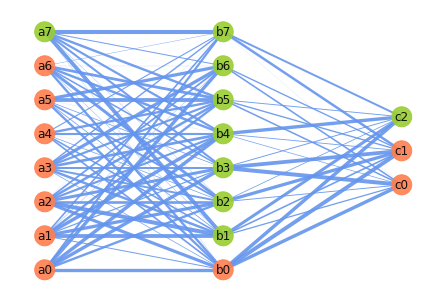

<Figure size 432x288 with 0 Axes>

In [8]:
W,V=MIN(A,W,B,V,C,1000)
Z=getOut(A,W,B,V,C)
print(A,C,bin(Z))
plot.Pintar(A,W,B,V,C).show()

Solución
<img src="ejercicio01.png">

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Ahora vamos a minimizar el error para todos los casos posibles, serán funciones parecidas pero ahora se quedarán con el cambio en los pesos cuando sea minimo para todos los casos

In [9]:
AT=[[0,0,0,0,0,0,1],
    [0,0,0,0,0,1,0],
    [0,0,0,0,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,0,0,0,0],
    [0,1,0,0,0,0,0],
    [1,0,0,0,0,0,0]]
CT=[[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
    
#Interconexiones, generamos una matriz de nº aleatorios 
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

In [10]:
#Para ello crea aquí tus funciones:
#def errorT(A,W,B,V,C):
#def MINT(A,W,B,V,C,nstep):

In [11]:
def errorT(AT,W,B,V,CT):
    e=0  
    for a,c in zip(AT,CT):
        Z=getOut(a,W,B,V,c)  
        for i in range(len(Z)):
            e+=(Z[i]-float(c[i]))**2
    return math.sqrt(e)

def MINT(AT,W,B,V,CT,nstep,AE):
    e1=errorT(AT,W,B,V,CT)    
    #print("Error = ",e1)
    ae=e1
    for i in range(nstep):    
        x1=random.randint(0,W.shape[0]-1)
        y1=random.randint(0,W.shape[1]-1)
        w2=W[x1,y1]
        W[x1,y1]=(1-2*random.random())*MAXP
        e2=errorT(AT,W,B,V,CT)
        if float(e1) < float(e2) or AE > random.random(): #AE metropolis
            W[x1,y1]=w2
        else: #aceptamos el cambio
            e1=e2        
        x2=random.randint(0,V.shape[0]-1)
        y2=random.randint(0,V.shape[1]-1)
        v2=V[x2,y2]
        V[x2,y2]=(1-2*random.random())*MAXP
        e2=errorT(AT,W,B,V,CT)
        if float(e1) < float(e2) or AE > random.random(): #AE metropolis:
            V[x2,y2]=v2
        else:
            e1=e2
    print("Error = ",e1," AE",ae-e1)
    return W,V

Vamos a aumentar el número de casos

In [12]:
for i in range(20):
    W,V=MINT(AT,W,B,V,CT,200,0)

Error =  1.648087623698589  AE 0.8216824772186677
Error =  0.3685981449660024  AE 1.2794894787325868
Error =  0.0018088005870209767  AE 0.3667893443789814
Error =  2.809753685460732e-09  AE 0.0018087977772672913
Error =  3.8065442862301104e-18  AE 2.809753681654188e-09
Error =  2.7957737651866154e-18  AE 1.010770521043495e-18
Error =  2.7955362779238687e-18  AE 2.3748726274675285e-22
Error =  3.3707387926335554e-21  AE 2.7921655391312352e-18
Error =  1.6770992562626475e-32  AE 3.3707387926167844e-21
Error =  2.3272176943656777e-46  AE 1.6770992562626242e-32
Error =  1.3391831610162666e-46  AE 9.880345333494112e-47
Error =  4.773923930827188e-53  AE 1.3391826836238735e-46
Error =  1.4332435956034115e-53  AE 3.340680335223776e-53
Error =  5.080082526271231e-62  AE 1.433243590523329e-53
Error =  6.136028797620743e-63  AE 4.466479646509157e-62
Error =  1.7978574999768212e-63  AE 4.3381712976439225e-63
Error =  1.7829178095416428e-63  AE 1.4939690435178452e-65
Error =  4.4990195110524715e-6

Solución
<img src="ejercicio02.png">

In [13]:
for a,c in zip(AT,CT):
    Z=getOut(a,W,B,V,c)
    if c == bin(Z):
        print(a,c,bin(Z))
    else:
        print(a,c,bin(Z),'*')

[0, 0, 0, 0, 0, 0, 1] [0, 0, 1] [0, 0, 1]
[0, 0, 0, 0, 0, 1, 0] [0, 1, 0] [0, 1, 0]
[0, 0, 0, 0, 1, 0, 0] [0, 1, 1] [0, 1, 1]
[0, 0, 0, 1, 0, 0, 0] [1, 0, 0] [1, 0, 0]
[0, 0, 1, 0, 0, 0, 0] [1, 0, 1] [1, 0, 1]
[0, 1, 0, 0, 0, 0, 0] [1, 1, 0] [1, 1, 0]
[1, 0, 0, 0, 0, 0, 0] [1, 1, 1] [1, 1, 1]


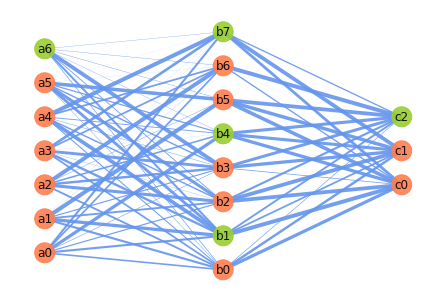

<Figure size 432x288 with 0 Axes>

In [14]:
plot.Pintar(AT[0],W,B,V,CT[0]).show()

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Vamos a ver como nuestra red neuronal aprende a sumar para ello utilizaremos 3 capas de neuronas:
ayuda: reutiza todo el código anterior

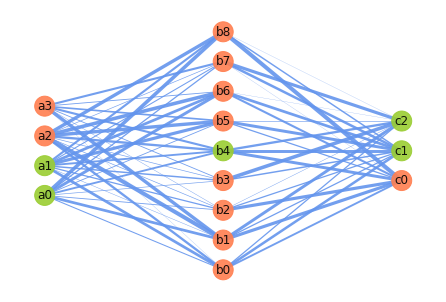

<Figure size 432x288 with 0 Axes>

In [15]:
#Capas de neuronas
A=[1,1,0,0]
B=[0,0,0,0,1,0,0,0,0]
C=[0,1,1]

#Interconexiones, generamos una matriz de nº aleatorios 
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

plot.Pintar(A,W,B,V,C).show()

Error =  0.0
[1, 1, 0, 0] [0, 1, 1] [0, 1, 1]


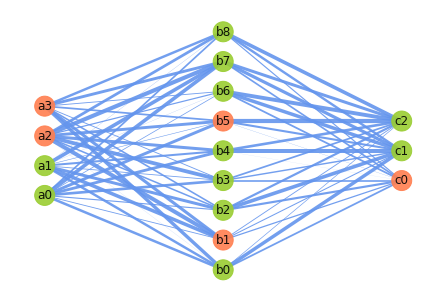

<Figure size 432x288 with 0 Axes>

In [16]:
W,V=MIN(A,W,B,V,C,1000)
Z=getOut(A,W,B,V,C)
print(A,C,bin(Z))
plot.Pintar(A,W,B,V,C).show()

Ahora lo hacemos para todos los casos posibles

In [17]:
AT=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
     [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
     [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
     [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]
CT=[[0,0,0],[0,0,1],[0,1,0],[0,1,1],
      [0,0,1],[0,1,0],[0,1,1],[1,0,0],
      [0,1,0],[0,1,1],[1,0,0],[1,0,1],
      [0,1,1],[1,0,0],[1,0,1],[1,1,0]]

#condiciones iniciales, W y V con valores aleatorios
W = np.array([[random.randint(-10,10)/10 for j in range(len(B))] for i in range(len(A))])
V = np.array([[random.randint(-10,10)/10 for j in range(len(A))] for i in range(len(B))])

In [18]:
for i in range(20):
    W,V=MINT(AT,W,B,V,CT,200,0)

Error =  2.7975770345263102  AE 1.5172808379639395
Error =  2.2722052330896414  AE 0.5253718014366688
Error =  2.2169435711961234  AE 0.055261661893518
Error =  2.1559899604568558  AE 0.06095361073926764
Error =  2.1529766794180043  AE 0.0030132810388514564
Error =  2.0392032887782645  AE 0.11377339063973979
Error =  1.842700868285643  AE 0.19650242049262157
Error =  1.836578548891875  AE 0.006122319393767839
Error =  1.836556308995011  AE 2.223989686411798e-05
Error =  1.8192522670129787  AE 0.01730404198203228
Error =  1.7646813259107352  AE 0.054570941102243475
Error =  1.7380197138319589  AE 0.026661612078776376
Error =  1.7374651040527782  AE 0.0005546097791806481
Error =  1.7299163675107323  AE 0.0075487365420459085
Error =  1.724557832680388  AE 0.005358534830344208
Error =  1.7245564265954068  AE 1.4060849813368748e-06
Error =  1.713582234381057  AE 0.01097419221434981
Error =  1.7135822124256836  AE 2.1955373297188885e-08
Error =  1.7133622222980343  AE 0.0002199901276493943
E

In [19]:
for a,c in zip(AT,CT):
    Z=getOut(a,W,B,V,c)
    if c == bin(Z):
        print(a,c,bin(Z))
    else:
        print(a,c,bin(Z),'*')

[0, 0, 0, 0] [0, 0, 0] [0, 0, 0]
[0, 0, 0, 1] [0, 0, 1] [0, 0, 1]
[0, 0, 1, 0] [0, 1, 0] [0, 1, 0]
[0, 0, 1, 1] [0, 1, 1] [0, 1, 1]
[0, 1, 0, 0] [0, 0, 1] [0, 0, 1]
[0, 1, 0, 1] [0, 1, 0] [0, 1, 0]
[0, 1, 1, 0] [0, 1, 1] [0, 1, 1]
[0, 1, 1, 1] [1, 0, 0] [1, 1, 0] *
[1, 0, 0, 0] [0, 1, 0] [0, 0, 0] *
[1, 0, 0, 1] [0, 1, 1] [0, 0, 1] *
[1, 0, 1, 0] [1, 0, 0] [1, 1, 0] *
[1, 0, 1, 1] [1, 0, 1] [1, 0, 1]
[1, 1, 0, 0] [0, 1, 1] [0, 0, 1] *
[1, 1, 0, 1] [1, 0, 0] [1, 0, 0]
[1, 1, 1, 0] [1, 0, 1] [1, 0, 1]
[1, 1, 1, 1] [1, 1, 0] [1, 1, 0]
